In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Homicide.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 13 columns):
X                  1015 non-null float64
Y                  1015 non-null float64
Index_             1015 non-null int64
Event_Unique_ID    1015 non-null object
Occurrence_year    1015 non-null int64
Division           1015 non-null object
Homicide_Type      1015 non-null object
Occurrence_Date    1015 non-null object
Hood_ID            1015 non-null int64
Neighbourhood      1015 non-null object
Lat                1015 non-null float64
Long               1015 non-null float64
ObjectId           1015 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 103.2+ KB


In [7]:
data['Homicide_Type'].value_counts()

Shooting    526
Other       263
Stabbing    226
Name: Homicide_Type, dtype: int64

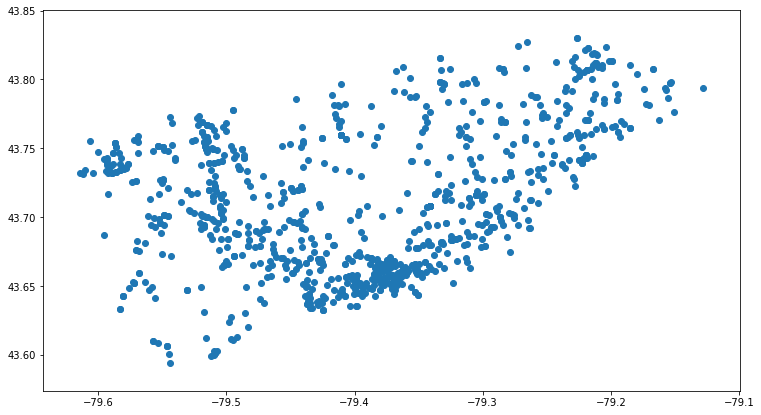

In [13]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

cmap = plt.cm.jet

ax.scatter(
    data['X'], 
    data['Y']
)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style

In [18]:
data = pd.read_csv("student-mat.csv")

print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [19]:
type(data)

pandas.core.frame.DataFrame

In [15]:
data = pd.read_csv("student-mat.csv", sep = ";")

print(data.head())

model_data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

print(model_data.head())

predict = "G3"

X = np.array(model_data.drop([predict], 1))
y = np.array(model_data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)


best = 0
for _ in range(30):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)

    print(acc)

    if acc > best:
        best = acc
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)

pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

print("Co: \n", + linear.coef_)
print("Intercept: \n", + linear.intercept_)

predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

style.use("ggplot")

P = "G1"
pyplot.scatter(model_data[P], model_data["G3"])
pyplot.xlabel(P)
pyplot.ylabel("Final Grade")
pyplot.show()

  school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0  GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mot...                                                                                                                                                                                 
1  GP,F,17,U,GT3,T,1,1,at_home,other,course,fathe...                                                                                                                                                                                 
2  GP,F,15,U,LE3,T,1,1,at_home,other,other,mother...                                                                                                                                                                                 
3  GP,F,15,U,GT3,T,4,2,health,services,home,mothe...                            

KeyError: "None of [Index(['G1', 'G2', 'G3', 'studytime', 'failures', 'absences'], dtype='object')] are in the [columns]"